## List of figures:
### 2. [Figure S1: Time spent on intervention screen](#timer)

#### Imports libraries

In [1]:
import matplotlib.pyplot as plt  # Plotting
import os  # File system handling
import pandas as pd  # Dataframe handling

from matplotlib.ticker import FuncFormatter  # Formating graphs

#### Set project directory

In [2]:
PROJECT_FOLDER = os.path.dirname(os.path.dirname(os.getcwd()))
FINAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'final')
TABLES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Pandas options

In [3]:
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 40)

#### Set plotting style

In [4]:
plt.style.use('classic')

#### Set plotting properties 

In [5]:
font_kw = dict(fontsize=11, color='k')
xlab_kw = dict(fontsize=11, labelpad=3)
ylab_kw = dict(fontsize=11, labelpad=3)
tick_kw = dict(
    size=5,
    which='both',
    direction='out',
    right=False,
    top=False,
    labelbottom=True
)

#### Retrieving dataframe

In [6]:
DATA = os.path.join(
    FINAL_DATA_FOLDER, 
    'experiment_1',                
    'data_final.feather'
)

df = pd.read_feather(DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Columns: 442 entries, Age to Q80_timer
dtypes: float64(225), int64(25), object(192)
memory usage: 10.4+ MB


#### Seperate quality concern-treatments from the following main analysys

In [7]:
sel = (df['Dataset'] == 'Main')
df = df[sel]

#### Figure S1: Time spent on intervention screen <a id='timer'></a>

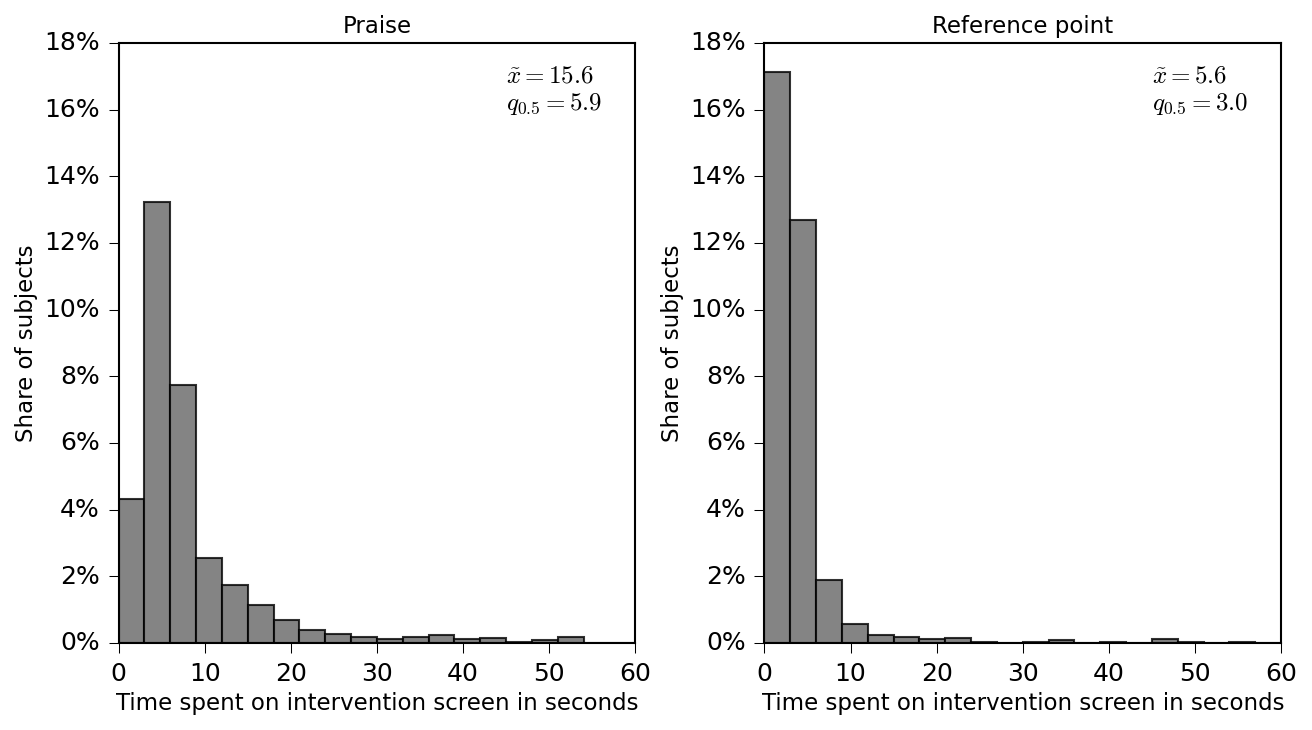

In [8]:
treat = ['Praise', 'Reference point']
hist_params = dict(bins=20, range=(0, 60), density=True, color='0.4', alpha=0.8) 
fig, axis = plt.subplots(ncols=2, nrows=1, figsize=(10, 5), dpi=150, facecolor='w')
fig.subplots_adjust(hspace=0.35, wspace=0.25)
for i, ax in enumerate(fig.axes):
    timer = df[df['Leadership_technique'] == treat[i]]['Intervention_timer']
    timer.hist(ax=ax, **hist_params)
    ax.set_title(treat[i], **font_kw)
    ax.grid(False)
    ax.set_ylim(0, 0.18)
    ax.tick_params(**tick_kw)
    ax.set_xlabel("Time spent on intervention screen in seconds", **xlab_kw)
    ax.set_ylabel("Share of subjects", **ylab_kw)
    ax.yaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
    mean, med = timer.mean(), timer.median() 
    ax.text(45, 0.16, f"$\~{{x}}={mean:.1f}$\n$q_{{0.5}}={med:.1f}$")

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_1', 
    'intervention_timer_hist.pdf'
)
plt.savefig(path, bbox_inches='tight')

In [9]:
!jupyter nbconvert --output-dir='./docs' --to html 3_intervention_timer.ipynb

[NbConvertApp] Converting notebook 3_intervention_timer.ipynb to html
[NbConvertApp] Writing 658987 bytes to docs/3_intervention_timer.html
